Step 20: the distribution of clusters as independent varaible, are used to train logistic regression model. Their classification report, confussion matrix and coefficients are computed.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter as counter
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

%matplotlib inline

In [83]:
df = pd.read_csv('PSG8_5_Clustering(55PC).csv')
y = df['label']
df = df[['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']]#, 'cluster6']]

In [84]:
df_l = pd.read_csv('large_dataset_predictors/PSG8_5_Clustering(55PC).csv')
X_l = df_l[['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']]#, 'cluster6']]
y_l = df_l['label']

shape of merged data (59, 5) and their target labels (59,)


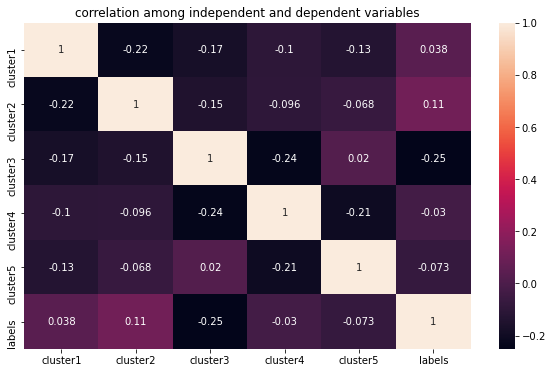

In [85]:
#dataset merging
X_merg = np.concatenate((df, X_l), axis=0)
y_merg = np.concatenate((y, y_l))

X = StandardScaler().fit_transform(X_merg)

df_p = pd.DataFrame(data=X, columns=['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5'])#, 'cluster6'])
df_p['labels'] = y_merg
plt.figure(figsize=(10,6))
plt.title('correlation among independent and dependent variables')
sns.heatmap(df_p.corr(), annot=True)

print('shape of merged data {} and their target labels {}' .format(X_merg.shape, y_merg.shape))

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_merg, y_merg, test_size=0.10, random_state=42)

In [87]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



In [89]:
print(confusion_matrix(y_test, predicted))

[[0 2]
 [0 4]]


In [90]:
predicted = model.predict(X_train)
print(classification_report(y_train, predicted))

              precision    recall  f1-score   support

           0       0.80      0.25      0.38        16
           1       0.75      0.97      0.85        37

    accuracy                           0.75        53
   macro avg       0.78      0.61      0.61        53
weighted avg       0.77      0.75      0.71        53



In [91]:
print(confusion_matrix(y_train, predicted))

[[ 4 12]
 [ 1 36]]


In [92]:
model.coef_

array([[ 0.00011901,  0.00089522, -0.00341704, -0.00124854, -0.0018934 ]])

In [93]:
k_fold = KFold(n_splits=10)
accuracy_array = []

LR = LogisticRegression(random_state=0)
for k, (train, test) in enumerate(k_fold.split(X_merg, y_merg)):
    LR.fit(X_merg[train], y_merg[train])
    accuracy_array.append(LR.score(X_merg[test], y_merg[test]))
    print('cross validation fold {} result: {}' .format(k, LR.score(X_merg[test], y_merg[test])))
print('\n')
print('average accuracy of K-fold: {}' .format(np.mean(accuracy_array)))

cross validation fold 0 result: 0.6666666666666666
cross validation fold 1 result: 0.6666666666666666
cross validation fold 2 result: 0.8333333333333334
cross validation fold 3 result: 0.6666666666666666
cross validation fold 4 result: 0.5
cross validation fold 5 result: 0.5
cross validation fold 6 result: 0.8333333333333334
cross validation fold 7 result: 0.5
cross validation fold 8 result: 0.6666666666666666
cross validation fold 9 result: 0.6


average accuracy of K-fold: 0.6433333333333333


In [94]:
accuracy_average = []
loo = LeaveOneOut()
loo.get_n_splits(X_merg)
i = 0

for train, test in loo.split(X_merg):
    
    LR.fit(X_merg[train], y_merg[train])
    accuracy_average.append(LR.score(X_merg[test], y_merg[test]))
    #print('cross validation fold {} result: {}' .format(i, LR.score(X_merg[test], y_merg[test])))
    i += 1
    
print('\naverage accuracy of one leave out CV: {}' .format(np.mean(accuracy_average)))

warnings.filterwarnings('ignore', category=UserWarning, append=True)


average accuracy of one leave out CV: 0.6779661016949152


In [46]:
df_l = pd.read_csv('large_dataset_predictors/PSG8_3_Clustering.csv')
X_l = df_l[['cluster1', 'cluster2', 'cluster3']]
y_l = df_l['label']

In [47]:
predicted = model.predict(X_l)
print(classification_report(y_l, predicted))
print(roc_auc_score(y_l, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.71      0.96      0.81        23

    accuracy                           0.69        32
   macro avg       0.35      0.48      0.41        32
weighted avg       0.51      0.69      0.59        32

0.4782608695652174


In [48]:
df_l = pd.read_csv('large_dataset_predictors/PSG8_3HMM_Clustering.csv')
X_l = df_l[['cluster1', 'cluster2', 'cluster3']]
y_l = df_l['label']

In [49]:
predicted = model.predict(X_l)
print(classification_report(y_l, predicted))
print(roc_auc_score(y_l, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.72      1.00      0.84        23

    accuracy                           0.72        32
   macro avg       0.36      0.50      0.42        32
weighted avg       0.52      0.72      0.60        32

0.5


In [50]:
# checking accuracy of trained model with 32 subjects (another dataset) features

df_l = pd.read_csv('large_dataset_predictors/PSG8_6_Clustering.csv')
X_l = df_l[['cluster1', 'cluster2', 'cluster3']]
y_l = df_l['label']

In [51]:
# checking accuracy of trained model with 32 subjects (another dataset) features

predicted = model.predict(X_l)
print(classification_report(y_l, predicted))
print('ROC results: {}'.format(roc_auc_score(y_l, predicted)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.72      1.00      0.84        23

    accuracy                           0.72        32
   macro avg       0.36      0.50      0.42        32
weighted avg       0.52      0.72      0.60        32

ROC results: 0.5


Applying support vector machine estimator

In [57]:
# https://towardsdatascience.com/svm-hyper-parameter-tuning-using-gridsearchcv-49c0bc55ce29

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
              
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, refit=True)
#grid.fit(X_train,y_train)

In [53]:
print(grid.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [95]:
svm = SVC(C=10, gamma=1, kernel='rbf', random_state=0)
svm.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [96]:
predictions = svm.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        37

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [102]:
k_fold = KFold(n_splits=10, random_state=1)
accuracy_array = []

SVM = SVC(C=1, gamma=.1, kernel='rbf', random_state=0)
for k, (train, test) in enumerate(k_fold.split(X_merg, y_merg)):
    SVM.fit(X_merg[train], y_merg[train])
    accuracy_array.append(SVM.score(X_merg[test], y_merg[test]))
    print('cross validation fold {} result: {}' .format(k, SVM.score(X_merg[test], y_merg[test])))
    
print('\naverage accuracy of 10-fold: {}' .format(np.mean(accuracy_array)))

cross validation fold 0 result: 0.5
cross validation fold 1 result: 0.5
cross validation fold 2 result: 1.0
cross validation fold 3 result: 1.0
cross validation fold 4 result: 0.5
cross validation fold 5 result: 0.6666666666666666
cross validation fold 6 result: 0.8333333333333334
cross validation fold 7 result: 0.5
cross validation fold 8 result: 0.6666666666666666
cross validation fold 9 result: 0.8

average accuracy of 10-fold: 0.6966666666666667


C:\Users\Shahzeb\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [103]:
accuracy_array = []
loo = LeaveOneOut()
loo.get_n_splits(X_merg)
i = 0

SVM = SVC(C=1, gamma=.01, kernel='rbf', random_state=0)
for train, test in loo.split(X_merg):
    SVM.fit(X_merg[train], y_merg[train])
    accuracy_array.append(SVM.score(X_merg[test], y_merg[test]))
    #print('cross validation fold {} result: {}' .format(i, SVM.score(X[test], y[test])))
    i += 1
print('\naverage accuracy of one leave out CV: {}' .format(np.mean(accuracy_array)))

warnings.filterwarnings('ignore', category=UserWarning, append=True)


average accuracy of one leave out CV: 0.6949152542372882


In [30]:
# checking accuracy of trained model with 32 subjects (another dataset) features

predicted = svm.predict(X_l)
print(classification_report(y_l, predicted))
print('ROC results: {}'.format(roc_auc_score(y_l, predicted)))

NameError: name 'svm' is not defined